# Kaggle 설문조사 분석
schema.csv : 설문 스키마가 있는 csv파일이다. 이 스키마에는 multipleChoiceResponses.csv 및 freeformResponses.csv의 각 열 이름에 해당하는 질문이 포함되어 있다.

multipleChoiceResponses.csv : 객관식 및 순위 질문에 대한 응답자의 답변, 각 행이 한 흥답자의 응답

freeformResponses.csv: Kaggle의 설문조사 질문에 대한 응답자의 주관식 답변. 임의로 지정되어 각 행이 같은 응답자를 나타내지 않음

conversionRates.csv : R패키지 'quantmod'에서 2017년 9월 14일에 액세스한 통화 변환율(USD)

RespondentTypeREADME.txt: schema.csv파일의 'Asked'열에 응답을 디코딩하는 스키마

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
#warning 무시
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#설문 스키마 읽어오기
question = pd.read_csv('Desktop/데이터분석/2017 survey/schema.csv')
question.shape
#(행개수,열개수)

(290, 3)

In [3]:
#상위 5개 .tail()은 하위 5개
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [4]:
#판다스로 선다형 객관식 문제에 대한 응답을 가져옴
mcq = pd.read_csv('Desktop/데이터분석/2017 survey/multipleChoiceResponses.csv',
                 encoding = 'ISO-8859-1', low_memory = False)
#(행개수, 열개수)
mcq.shape


(16716, 228)

In [5]:
#head(), tail() 항목이 보여짐
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [6]:
mcq.head(10)


,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,India,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,...,Very Important,Somewhat important,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


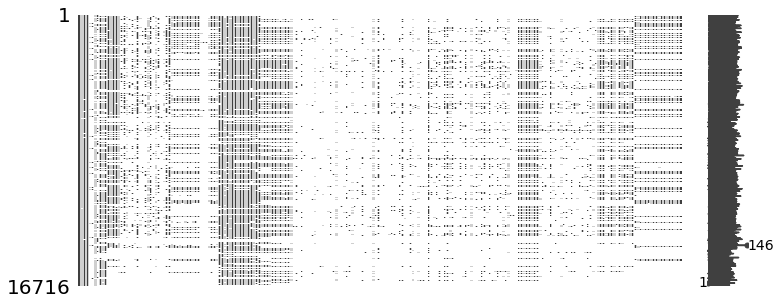

In [7]:
# missingno는 NaN데이터(응답하지 않은데이터)들에 대해 시각화를 해준다.
# Nan데이터의 컬럼이 많아 아래 그래프만으로는 내용을 파악하기 힘듦
import missingno as msno
msno.matrix(mcq, figsize=(12,5))


# 설문통계

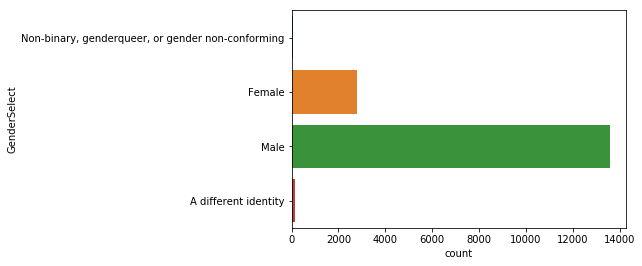

In [8]:
#성별
#mcq에서 GenderSelect 항목에 대한 data
sns.countplot(y='GenderSelect', data = mcq)


In [9]:
#국가별 응답수
# ,value_counts()를 하면 같은 응답의개수를 count한 결과를 얻을 수있음
con_df = pd.DataFrame(mcq['Country'].value_counts())
#'country' 컬럼을 인덱스로 지정해주고
con_df['국가'] = con_df.index
#print(con_df.index)
#컬럼의 순서대로 응답 수 ,국가로 컬럼명을 지정
con_df.columns = ['응답 수', '국가']
#index컬럼을 삭제하고 순위를 알기위해 reset_index()를 해줌
con_df = con_df.reset_index().drop('index', axis = 1)
con_df.head(20)


,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [10]:
mcq['Age'].describe()
# 참가자 수(count), 평균(mean), 표준편차, 최대, 최소, 상위 25% 등등 

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

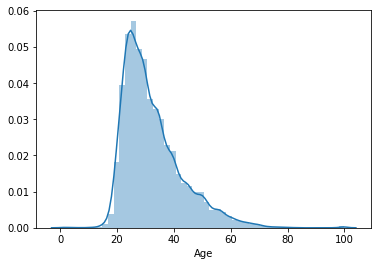

In [11]:
sns.distplot(mcq[mcq['Age']>0]['Age'])
#Age가 0 이상인 mcq의 Age

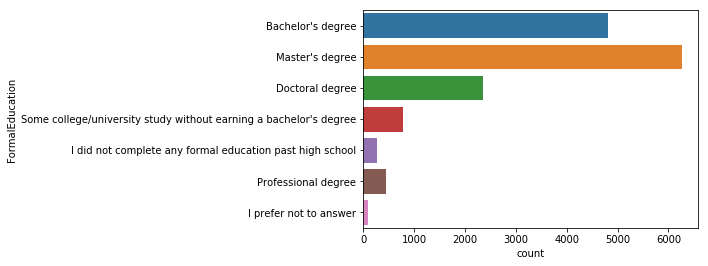

In [12]:
sns.countplot(y='FormalEducation', data = mcq)

석사학위를 가지고 있는 사람이 가장 많다.

# 전공

In [13]:
#value_counts를 사용하면 그룹화 된 데이터의 카운트 값을 보여줌
#normalize = True옵션을 사용하면 해당 데이터가 전체 데이터에서 어느정도의 비율을 차지하는지 알 수 있다.
mcq_major_count = pd.DataFrame( mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize = True))
#하나의 테이블에 합침
mcq_major_df = mcq_major_count.merge(mcq_major_percent, left_index = True, right_index = True)
mcq_major_df.columns = ['응답수', '비율']
mcq_major_df

,응답수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


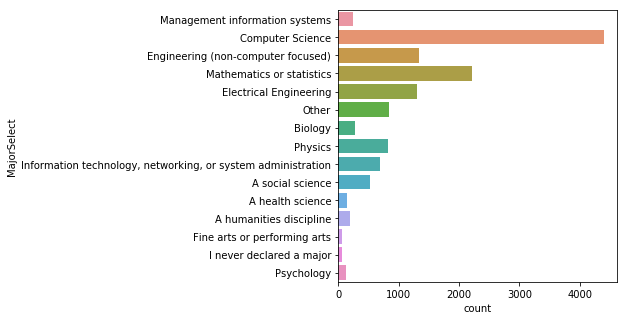

In [14]:
#재학중인 사람들의 전공 현황
plt.figure(figsize = (5,5))
sns.countplot(y = 'MajorSelect', data = mcq)

# 취업여부

In [15]:
mcq_es_count = pd.DataFrame(mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(mcq['EmploymentStatus'].value_counts(normalize = True))
mcq_es_df = mcq_es_count.merge(mcq_es_percent, left_index = True, right_index = True)
mcq_es_df.columns = ['응답 수', '비율']
mcq_es_df
                     

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


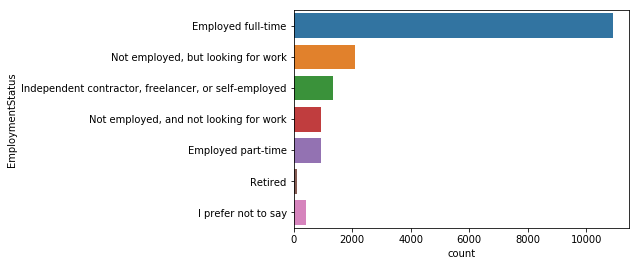

In [16]:

sns.countplot(y= "EmploymentStatus", data = mcq)

풀타임 근로자가 65%로 가장 많고, 그다음 구직자가 12%로 많다.

# 프로그래밍 경험
- 'Tenure'항목은 데이터사이언스 분야에서 코딩 경험이 얼마나 되는지에 대한 질문이다.

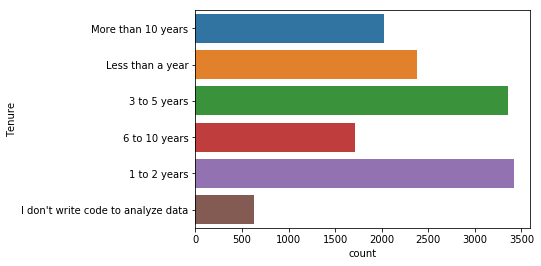

In [17]:
sns.countplot(y='Tenure',data = mcq)

In [18]:
pd.DataFrame(mcq['Tenure'].value_counts(normalize=True))

,Tenure
1 to 2 years,0.253030
3 to 5 years,0.247931
Less than a year,0.175879
More than 10 years,0.149867
6 to 10 years,0.126663
I don't write code to analyze data,0.046630


데이터사이언스분야의 코딩경험이 5년 이하가 50%이상을 차지한다.

# 한국인 
- 설문조사에 참여한 한국인에 대해 알아보자.

한국인 수:194  비율: 0.011605647284039244


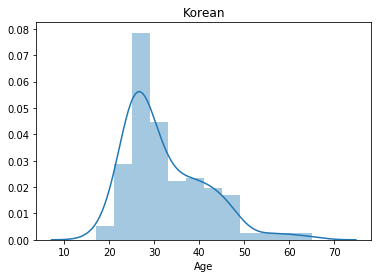

In [19]:
korea  = mcq.loc[(mcq['Country']=='South Korea')]
print('한국인 수:' + str(korea.shape[0]),' 비율: '+str(korea.shape[0]/mcq.shape[0]))
sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()

설문조사에 참여한 한국인은 총 194명이며, 전체 참여자의 1% 정도이다.

In [20]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korean')

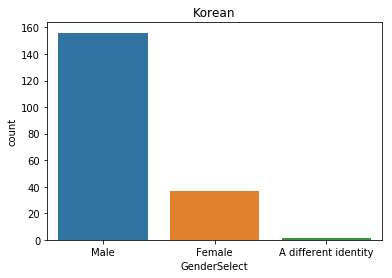

In [21]:
sns.countplot(x= 'GenderSelect', data = korea)
plt.title('Korean')

Text(0.5, 1.0, 'Korean Male')

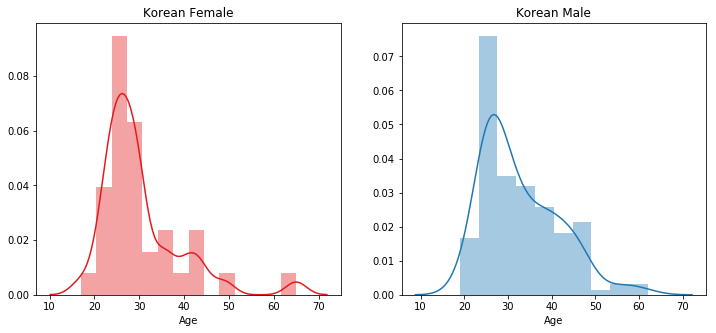

In [22]:
figure, (ax1, ax2) = plt.subplots(ncols = 2)
figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(),
            norm_hist = False, color= sns.color_palette('Paired')[5], ax = ax1)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(),
            norm_hist = False, color = sns.color_palette('Paired')[1], ax = ax2)
ax1.set_title('Korean Female')
ax2.set_title('Korean Male')

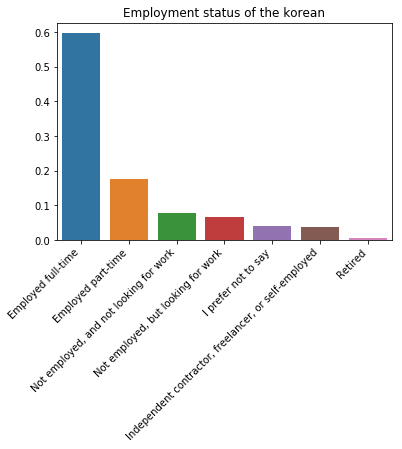

In [23]:
sns.barplot(x=korea['EmploymentStatus'].unique(), y= korea['EmploymentStatus'].value_counts(normalize = True))
#글자가 긴경우 기울여서 겹치지 않도록하기위함임
plt.xticks(rotation = 45 , ha = 'right')
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

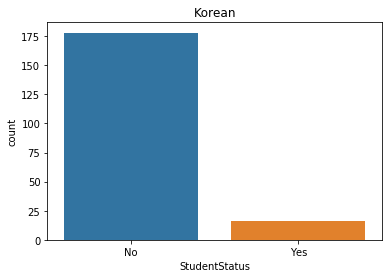

In [24]:
#무응답은 모두 No로 대체
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data = korea)
plt.title('Korean')
plt.show()

In [25]:
#풀타임 근무자와 구직자의 수(행 개수)
full_time = mcq.loc[(mcq['EmploymentStatus']=='Employed full-time')]
print('full-time: ',full_time.shape[0])
looking_for_job = mcq.loc[(mcq['EmploymentStatus']=='Not employed, but looking for work')]
print('looking-for-job: ',looking_for_job.shape[0])

full-time:  10897
looking-for-job:  2110


# 자주 묻는 질문 FAQ
 - 초보자들이 묻는 가장 일반적인 질문에 대한 답을 시각화한다.

## Q1. Python과 R중 어떤 언어를 배워야 할까요?

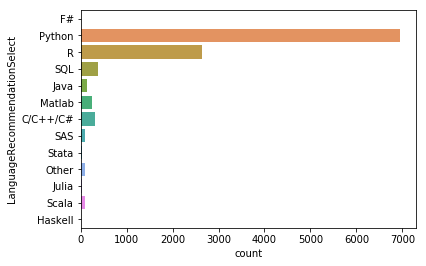

In [26]:
sns.countplot(y = mcq['LanguageRecommendationSelect'])

- Python, R이 대부분을 차지하고, 이 중에서도 Python이 압도적이다.

- 이번에는 설문 참여자들의 직업에 대해 알아보고 직업에 따라 어떤 언어를 사용하는지 알아보자.

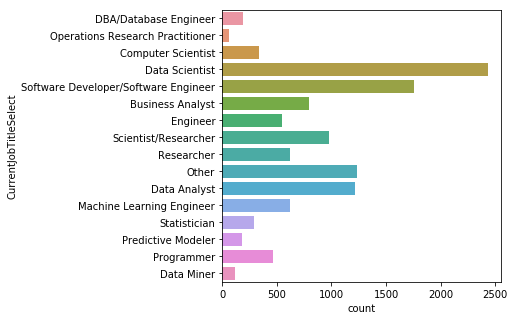

In [27]:
#설문 참여자들의 직업
plt.figure(figsize = (5,5))
sns.countplot(y=mcq['CurrentJobTitleSelect'])

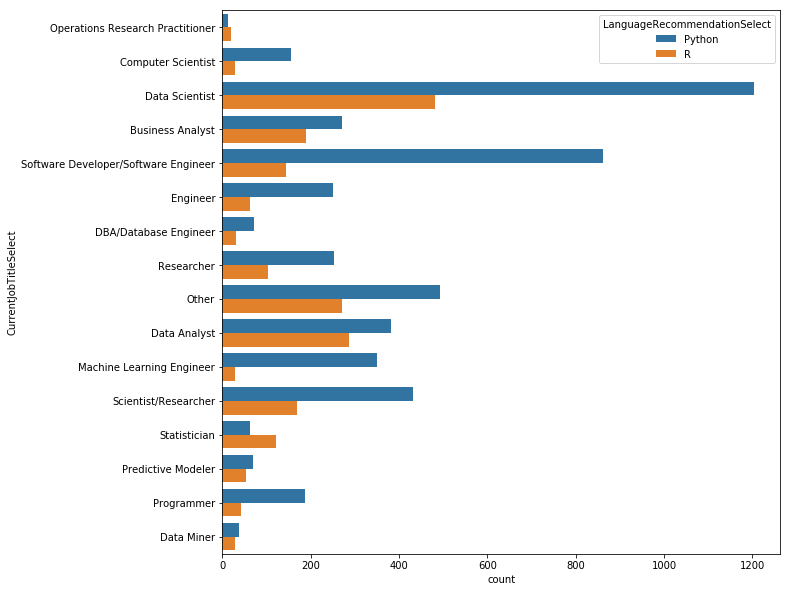

In [28]:
dat = mcq[(mcq['CurrentJobTitleSelect'].notnull())&((mcq['LanguageRecommendationSelect'] == 'Python') | (mcq['LanguageRecommendationSelect'] == 'R'))]
plt.figure(figsize = (10,10))
sns.countplot(y='CurrentJobTitleSelect', hue = 'LanguageRecommendationSelect',data = dat)

- 각각의 직업에서 Python또는 R을 사용하는 사람들의 수를 통계로 나타냈다.대부분 R보다 Python을 쓰는 사람들이 압도적이다. 하지만 Statistician은 R을 사용하는 사람이 Python을 사용하는 사람보다 약 2배정도 많다.

------------------------------------------------------------------------------
Answer) 대부분 Data를 다루는 직업을 가진 사람들은 R보다는 Python을 압도적으로 많이 사용하므로 Python을 먼저 공부하는 것이 좋을 것같다.

## Q2. 데이터 사이언스 분야에서 앞으로 크게 주목받을 것은 무엇일까요?

In [29]:
mcq_percent = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts(normalize = True))
mcq_count = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts())
mcq_total = mcq_percent.merge(mcq_count, left_index = True, right_index=True)
mcq_total.columns = [ '비율' , '응답수']
mcq_total.head(10)


,비율,응답수
TensorFlow,0.238316,2621
Python,0.155756,1713
R,0.082742,910
Spark / MLlib,0.068649,755
Hadoop/Hive/Pig,0.037916,417
Other,0.037007,407
Amazon Machine Learning,0.035643,392
Jupyter notebooks,0.032551,358
I don't plan on learning a new tool/technology,0.031006,341
Google Cloud Compute,0.026914,296


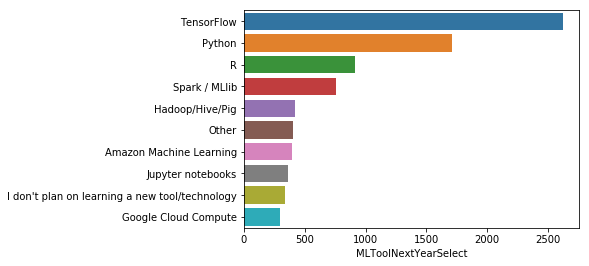

In [30]:
data =  mcq['MLToolNextYearSelect'].value_counts().head(10)
sns.barplot(y= data.index ,x= data)

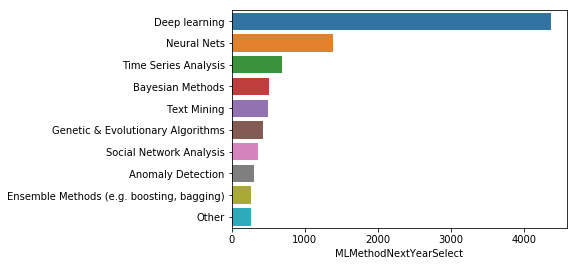

In [31]:
data = mcq['MLMethodNextYearSelect'].value_counts().head(10)
sns.barplot(y= data.index, x = data)

- 내년에 주목받을 데이터사이언스 툴과 방법 상위 10가지에 대한 통계를 구해보았다.
    
    툴은 텐서플로우, 파이썬, R, Spark/MLlib 이 네가지가 전체 응답자의 50% 이상에게 선택을 받았다.

    방법은 딥러닝, 뉴럴넷이 압도적인 선택을 받았다.

---------------------------------
Answer)굉장히 다양한 선택지가 있지만 그 중 눈에 띄게 선택 받은 선택지가 앞으로 주목받을 확률이 가장 높을 것이므로, 다음과 같이 답할 수 있겠다.

앞으로 데이터사이언스분야에서 텐서플로우와 파이썬 툴이 가장 많이 쓰일 것이고, 딥러닝과 뉴럴넷이 많이 활용되고 연구될 것이다.  


## Q3. 어디에서 데이터 사이언스를 배워야 할까요?

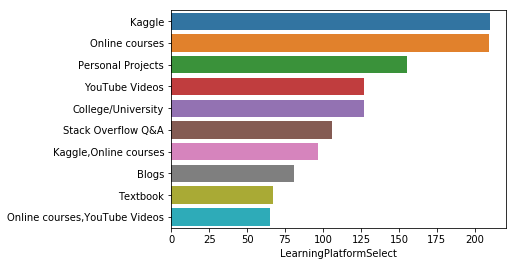

In [32]:

data = mcq['LearningPlatformSelect'].value_counts().head(10)
sns.barplot(y=data.index, x = data)

- 사람들이 데이터사이언스를 배울때 Kaggle(1위), Online 강의(2위), 개인 프로젝트(3위), 유튜브(4위), 대학교(5위)에서 많이 참고한다고 한다. 이 다섯가지에 대해 좀 더 알아보자.

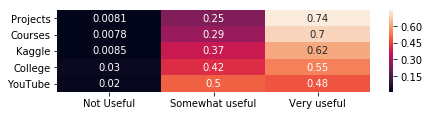

In [33]:
use_features = [x for x in mcq.columns if x.find('LearningPlatformUsefulness')!=-1]
#각 학습 플랫폼의 유용함을 알아보자
fdf = {}
for i in use_features:
    tmp = i.split('LearningPlatformUsefulness')
    if tmp[1]=='Kaggle' or tmp[1] =='Courses' or tmp[1]=='Projects' or tmp[1]=='YouTube' or tmp[1]=='College':
        a = mcq[i].value_counts(normalize=True)
        fdf[tmp[1]] = a

#transpose: x,y축이 바뀜
fdf = pd.DataFrame(fdf).transpose().sort_values('Very useful', ascending = False)
plt.figure(figsize=(7,1.5))
#annot은 색별로 수치를 나타내줌
sns.heatmap(fdf,annot = True)
                
    

- 상위 다섯개 학습 플랫폼의 유용함에 대해 통계를 내보았다. 
    
    매우 유용하다는 답변이 많은 순으로 나타냈는데, Project(3위) - Courses(2위) - Kaggle(1위) - College(5위) - YouTube(4위) 순으로 나타났다. 

---------------------------------
Answer) 사람들이 데이터과학을 공부할 때 많이 사용하는 플랫폼과 유용한 플랫폼에 대한 통계를 내보았다.
가장 많이 사용하는 플랫폼은 Kaggle(사실 이 설문조사가 Kaggle주관이다.)과 온라인 강의이고, 가장 유용한 플랫폼은 개인 프로젝트를 하는 것과 온라인 강의라고 한다.


가장 많이 사용한다는 의미는 접하기 쉽다는 것이고, 가장 유용하다는 의미는 얻게되는 지식이 많다는 것으로 해석할 수 있다.
따라서 데이터과학에 대해 기초지식이 없는 입문자는 접하기 쉬운 플랫폼을 통해 데이터 과학에 대한 이해를 하는 것부터 시작하는 것을 추천한다.
어느정도 지식이 있는 학습자라면 개인 프로젝트의 주제와 프로세스 등을 기획하고 진행하면서 알고있는 지식을 더욱 확고히하고, 새로운 지식을 얻도록 하자.

## Q4. 데이터 과학을 위해 높은 사양의 컴퓨터가 필요한가요?

In [34]:
# Q : 개인 프로젝트에서 어떤HW를 사용하는지

qc = question.loc[question['Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [35]:
#4206명이 응답했다.
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()]['HardwarePersonalProjectsSelect'].shape



(4206,)

In [115]:
mcq['HardwarePersonalProjectsSelect'
 ] = mcq['HardwarePersonalProjectsSelect'
 ].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(lambda x:
 pd.Series(x['HardwarePersonalProjectsSelect']),
 axis=1).stack().reset_index(level=1, drop=True)
s.name = 'hardware'
s=s[s!='nan']
pd.DataFrame(s.value_counts())

,hardware
Basic laptop (Macbook),2246
Laptop + Cloud service (AWS,669
Azure,669
GCE ...),669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


---------
Answer) 맥북을 사용하는 응답자가 가장 많고 랩탑과 함께 클라우드(AWS, Azure, GCE등)를 사용하는 사람, 게임용 노트북이 그 뒤를 잇는다.

## Q5. 데이터 사이언스 공부에 얼마나 많은 시간을 사용하는지?

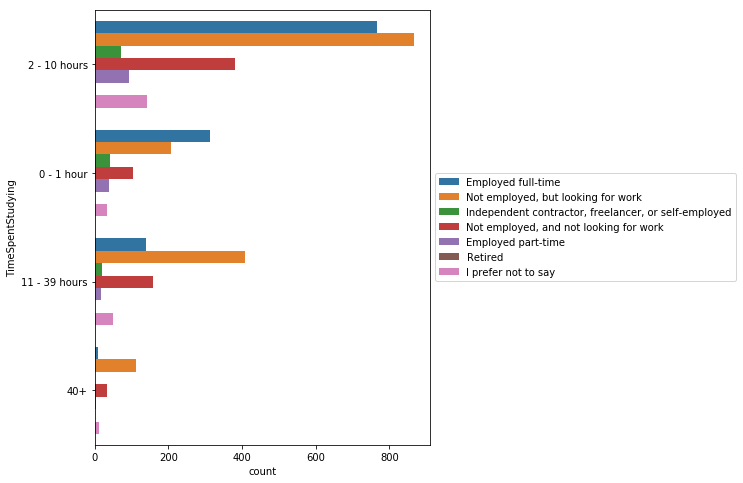

In [117]:

plt.figure(figsize=(6, 8))
sns.countplot(y='TimeSpentStudying',data=mcq,
 hue='EmploymentStatus'
 ).legend(loc='center left',
 bbox_to_anchor=(1, 0.5))


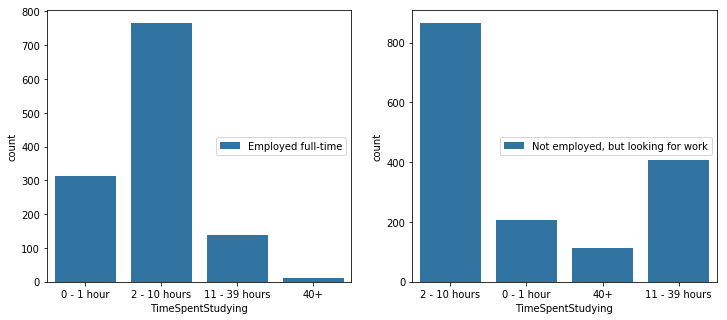

In [119]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.countplot(x='TimeSpentStudying',
 data=full_time,
 hue='EmploymentStatus', ax=ax1
 ).legend(loc='center right',
 bbox_to_anchor=(1, 0.5))

sns.countplot(x='TimeSpentStudying',
 data=looking_for_job,
 hue='EmploymentStatus', ax=ax2
 ).legend(loc='center right',
 bbox_to_anchor=(1, 0.5))

----------------
Answer) 구직자와 현업자를 구분했다. 구직자와 현업자 모두 2~10시간이 가장 많았다. 그다음으로 구직자는 11~39시간, 현업자는 0~1시간 공부한다는 응답자가 많다.


## Q6. 블로그, 팟캐스트, 수업, 기타 등등 추천할만한 것이 있는지?

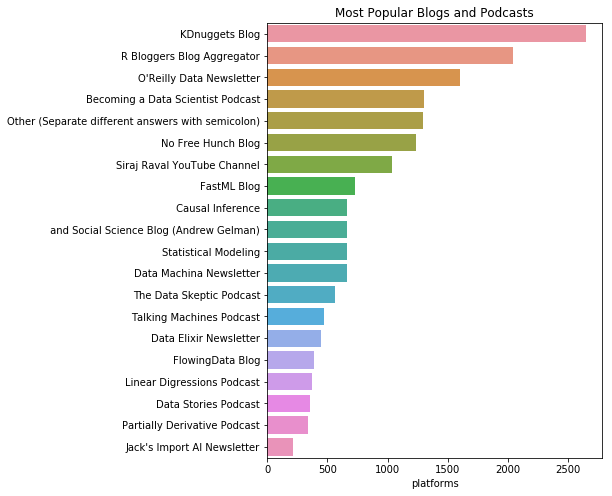

In [120]:
mcq['BlogsPodcastsNewslettersSelect'] = mcq[
 'BlogsPodcastsNewslettersSelect'
].astype('str').apply(lambda x: x.split(','))

s = mcq.apply(lambda x: pd.Series(x['BlogsPodcastsNewslettersSelect']),
 axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platforms'
s = s[s != 'nan'].value_counts().head(20)

plt.figure(figsize=(6,8))
plt.title("Most Popular Blogs and Podcasts")
sns.barplot(y=s.index, x=s)

- KDNuggets Blog, R Bloggers Blog Aggregator 그리고 O'Reilly Data Newsletter가 가장 유용하다고 투표를 받았다.
    데이터 사이언스 되기라는 팟캐스트도 유명한 듯하다.

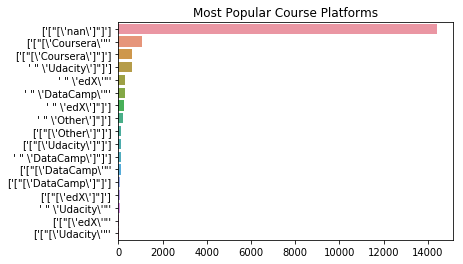

In [124]:
mcq['CoursePlatformSelect'] = mcq['CoursePlatformSelect'].astype('str').apply(lambda x: x.split(','))
t = mcq.apply(lambda x: pd.Series(x['CoursePlatformSelect']),axis=1).stack().reset_index(level=1, drop=True)
t = t[t!='nan'].value_counts()
plt.title('Most Popular Course Platforms')
sns.barplot(y = t.index, x = t)

-----------
Answer) KDNuggets Blog, R Bloggers Blog Aggregator 그리고 O'Reilly Data Newsletter가 가장 유용하고, Coursera와 Udacity 학습플랫폼이 유명하다.

## Q7. 데이터 사이언스 직무에서 가장 중요하다고 생각되는 스킬은?

In [62]:
job_features = [
    x for x in mcq.columns if x.find('JobSkillImportance') != -1 
    and x.find('JobSkillImportanceOther')== -1]
job_features

['JobSkillImportanceBigData',
 'JobSkillImportanceDegree',
 'JobSkillImportanceStats',
 'JobSkillImportanceEnterpriseTools',
 'JobSkillImportancePython',
 'JobSkillImportanceR',
 'JobSkillImportanceSQL',
 'JobSkillImportanceKaggleRanking',
 'JobSkillImportanceMOOC',
 'JobSkillImportanceVisualizations']

- 데이터 사이언스와 연관있는 것들에 대한 중요도를 알아보자

In [63]:
jdf = {}
for feature in job_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jdf[feature[len('JobSkillImportance'):]] = a
jdf


{'BigData': Nice to have    0.574065
 Necessary       0.379929
 Unnecessary     0.046006
 Name: JobSkillImportanceBigData, dtype: float64,
 'Degree': Nice to have    0.598107
 Necessary       0.279867
 Unnecessary     0.122026
 Name: JobSkillImportanceDegree, dtype: float64,
 'Stats': Necessary       0.513889
 Nice to have    0.457576
 Unnecessary     0.028535
 Name: JobSkillImportanceStats, dtype: float64,
 'EnterpriseTools': Nice to have    0.564970
 Unnecessary     0.290200
 Necessary       0.144829
 Name: JobSkillImportanceEnterpriseTools, dtype: float64,
 'Python': Necessary       0.645994
 Nice to have    0.327214
 Unnecessary     0.026792
 Name: JobSkillImportancePython, dtype: float64,
 'R': Nice to have    0.513945
 Necessary       0.414807
 Unnecessary     0.071247
 Name: JobSkillImportanceR, dtype: float64,
 'SQL': Nice to have    0.491778
 Necessary       0.434224
 Unnecessary     0.073998
 Name: JobSkillImportanceSQL, dtype: float64,
 'KaggleRanking': Nice to have    0.677

In [64]:
jdf = pd.DataFrame(jdf).transpose()
jdf



,Necessary,Nice to have,Unnecessary
BigData,0.379929,0.574065,0.046006
Degree,0.279867,0.598107,0.122026
Stats,0.513889,0.457576,0.028535
EnterpriseTools,0.144829,0.564970,0.290200
Python,0.645994,0.327214,0.026792
R,0.414807,0.513945,0.071247
SQL,0.434224,0.491778,0.073998
KaggleRanking,0.118863,0.677261,0.203876
MOOC,0.107255,0.606994,0.285752
Visualizations,0.455392,0.490820,0.053788


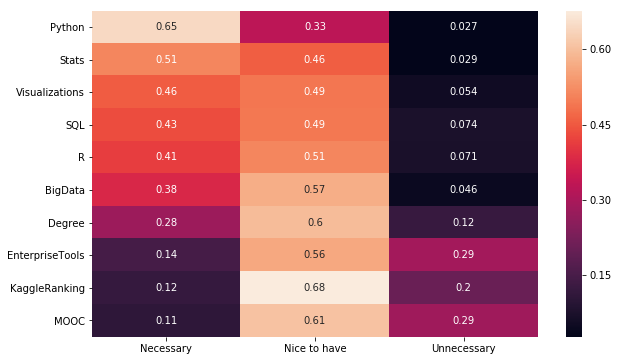

In [58]:
plt.figure(figsize = (10,6))
sns.heatmap(jdf.sort_values("Necessary", ascending = False), annot = True)

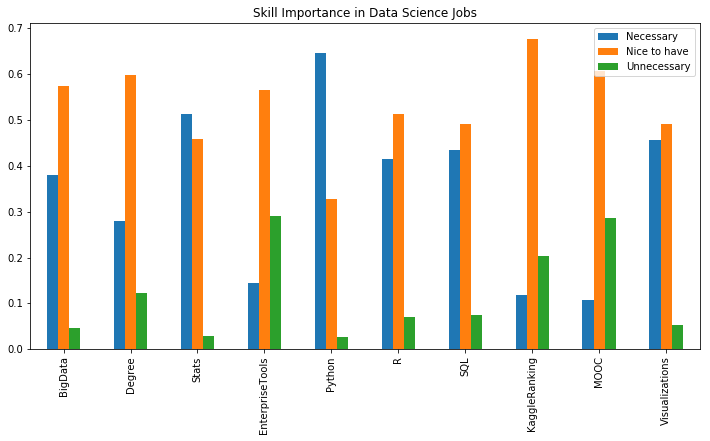

In [61]:
jdf.plot(kind = 'bar', figsize = (12,6), title = 'Skill Importance in Data Science Jobs')

- Python이 중요하다는 응답이 가장 많고, 그다음 Stats, Visualization, SQL, R순으로 중요도가 높다고 응답했다.

----------------------------------
Answer) 데이터과학직무에서 Python과 통계는 필수적인 항목으로 보인다. 나머지 항목들도 중요하지만 선택적으로 공부하면 되겠다. 

## Q8. 데이터 과학자의 평균 급여는 얼마나 될까?

In [69]:
mcq[mcq['CompensationAmount'].notnull()].shape

(5224, 228)

- 데이터 과학자 5224명이 답했다.

In [73]:
mcq['CompensationAmount'] = mcq['CompensationAmount'].str.replace(',','')
mcq['CompensationAmount'] = mcq['CompensationAmount'].str.replace('-','')
#환율계산을 위한 정보 가져오기
rates = pd.read_csv('Desktop/데이터분석/2017 survey/conversionRates.csv')
rates.drop('Unnamed: 0', axis = 1, inplace = True)
salary = mcq[['CompensationAmount','CompensationCurrency',
 'GenderSelect',
 'Country',
 'CurrentJobTitleSelect']].dropna()
salary = salary.merge(rates, left_on = 'CompensationCurrency', right_on = 'originCountry',how = 'left')
salary['Salary'] = pd.to_numeric(salary['CompensationAmount'])*salary['exchangeRate']
salary.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000,250000.0
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310,64184.8
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402,20882.4
3,95000,INR,Male,India,Data Scientist,INR,0.015620,1483.9
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304,36634.4


In [75]:
print('Maximum Salary is USD $',
 salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD $',
 salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $',
 salary['Salary'].dropna().astype(int).median())

Maximum Salary is USD $ 208999999
Minimum Salary is USD $ -2147483648
Median Salary is USD $ 53812.0


- 평균 급여는 USD $53,812이다. 

Text(0.5, 1.0, 'Highest Salary Paying Countries')

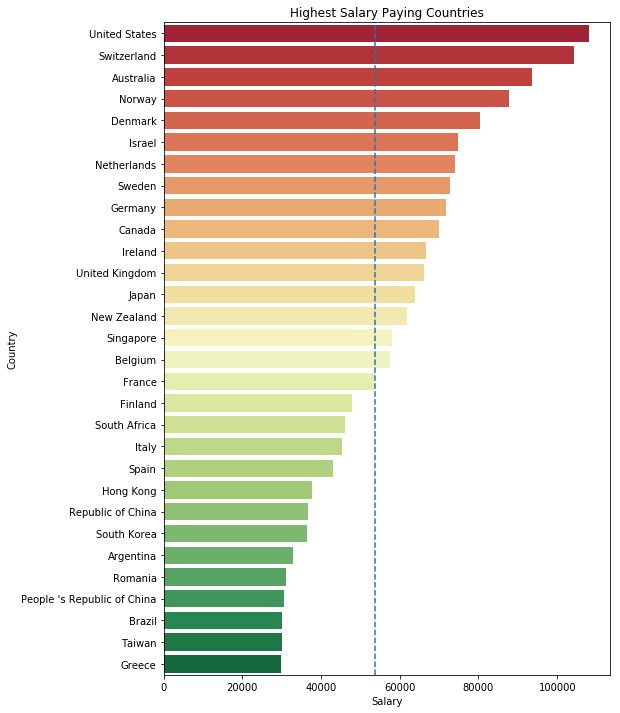

In [82]:
plt.subplots(figsize = (8,12))
sal_coun = salary.groupby(
'Country')['Salary'].median().sort_values(ascending = False)[:30].to_frame()
sns.barplot('Salary', sal_coun.index, data = sal_coun, palette = 'RdYlGn')
#axvline = 수직선을 원하는 위치, 스타일로 긋기
plt.axvline(salary['Salary'].median(), linestyle = 'dashed')
plt.title('Highest Salary Paying Countries')

- 각 나라별로 급여를 통계 내보았다. 미국과 스위스가 비슷한 수치로 1,2등을 차지하고 있고 그다음 호주, 노르웨이 등이 있다. 

- 중앙값을 수직선으로 표시해보았다. 50000달러와 60000달러 사이다.

--------------------
Answer) 각 나라마다 급여 차이가 꽤 나서 평균값을 단정짓기 어렵기 때문에 나라별로 급여를 보는 것이 좋을 것같다.

## Q9. 개인 프로젝트나 학습용 데이터를 어디에서 얻나요?

In [83]:
mcq['PublicDatasetsSelect'] = mcq['PublicDatasetsSelect'].astype('str').apply(lambda x: x.split(','))
q = mcq.apply(lambda x: pd.Series(x['PublicDatasetsSelect']),axis = 1).stack().reset_index(level = 1, drop = True)
q.name = 'courses'
q = q[q!='nan'].value_counts()
pd.DataFrame(q)

,courses
Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.),6843
Google Search,3600
University/Non-profit research group websites,2873
I collect my own data (e.g. web-scraping),2560
GitHub,2400
Government website,2079
Other,399


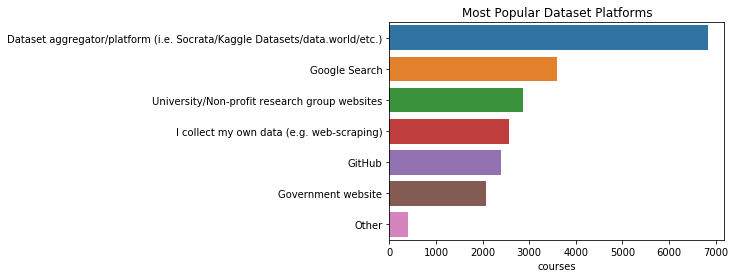

In [89]:
plt.title('Most Popular Dataset Platforms')
sns.barplot(y=q.index, x=q)

- Kaggle, Socrata등과 같은 데이터를 모아놓은 플랫폼에서 주로 얻는다고 한다. 그리고 구글을 통해서도 많이 얻는 편이다.

## Q10. 데이터 사이언스 업무에서 가장 많은 시간을 필요로 하는 일은?

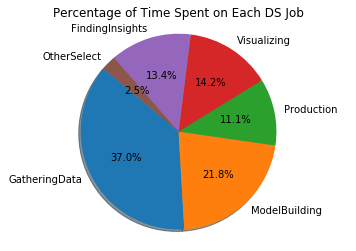

In [93]:
time_features = [x for x in mcq.columns if x.find('Time')!=-1][4:10]
tdf = {}
for feature in time_features:
    tdf[feature[len('Time'):]] = mcq[feature].mean()
tdf = pd.Series(tdf)

plt.pie(tdf, labels = tdf.index, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Percentage of Time Spent on Each DS Job')
plt.show()

## Q11. 데이터사이언스 직업을 찾는데 가장 고려해야할 요소는 무엇일까요?

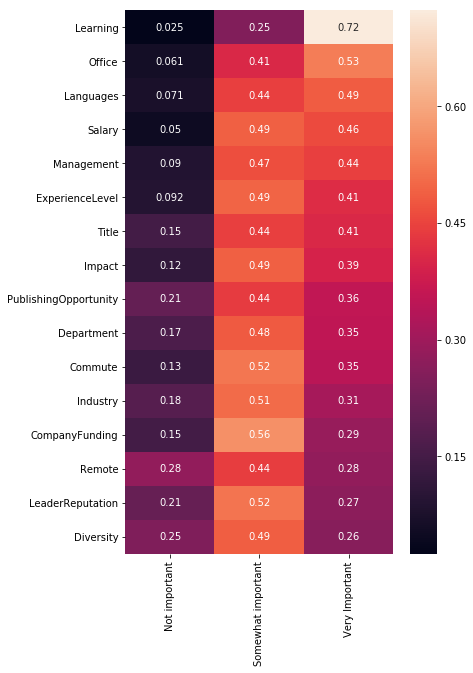

In [95]:
job_factors = [x for x in mcq.columns if x.find('JobFactor') != -1]
jfdf = {}
for feature in job_factors:
    a  = mcq[feature].value_counts()
    a = a/a.sum()
    jfdf[feature[len('JobFactor'):]] = a
jfdf = pd.DataFrame(jfdf).transpose()
plt.figure(figsize = (6,10))
sns.heatmap(jfdf.sort_values('Very Important', ascending = False),annot = True)

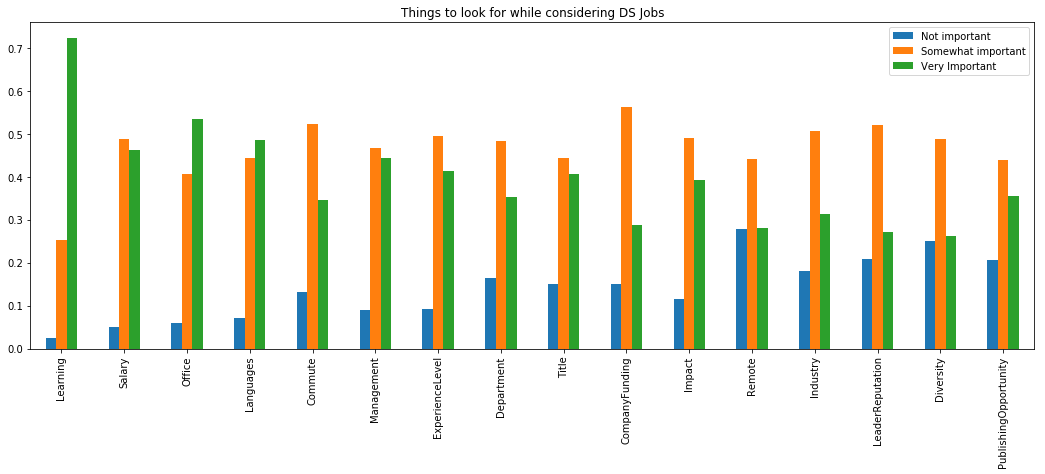

In [97]:
jfdf.plot(kind = 'bar', figsize = (18,6), title = 'Things to look for while considering DS Jobs')
plt.show()

------------------------
Answer) 데이터 사이언티스트로 직업을 찾을 때 가장 고려할 요소는 배울 수 있는 곳인지, 사무실 근무환경, 프레임워크나 언어, 급여, 경영상태, 경력 정도 순이다.

## Q12. 데이터 사이언티스트가 되기 위해 학위가 중요할까요?

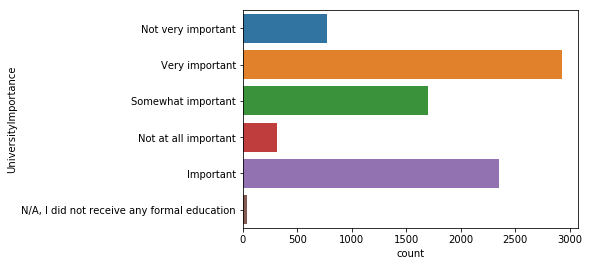

In [104]:
sns.countplot(y=mcq['UniversityImportance'])

----------------
Answer) 학위가 매우 중요하다는 답변이 가장 많다.

## Q13. 어디에서부터 데이터사이언스를 시작해야할까요?

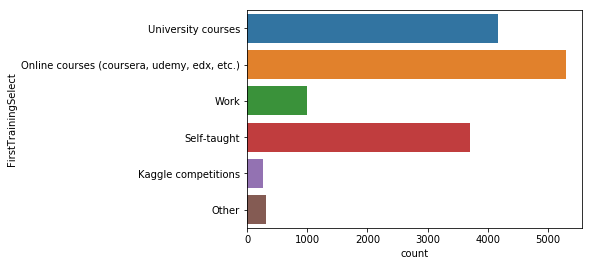

In [103]:
sns.countplot(y= mcq['FirstTrainingSelect'])

---------------
Answer) 온라인 강의, 학교수업, 개인프로젝트 순으로 많이 차지하고 있다. 

## Q14. 데이터사이언티스트 이력서에서 가장 중요한것은 무엇일까요?

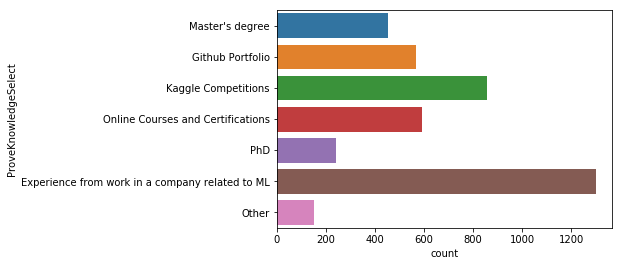

In [106]:
sns.countplot(y=mcq['ProveKnowledgeSelect'])

----------------
Answer) 머신러닝과 관련된 직무경험이 가장 중요하고 Kaggle경진대회가 그다음으로 중요하다고 한다. 온라인 강의 수료증, 깃허브 포트폴리오 등도 중요하다.

## Q15. 머신러닝 알고리즘을 사용하기 위해 수학이 필요할까요?

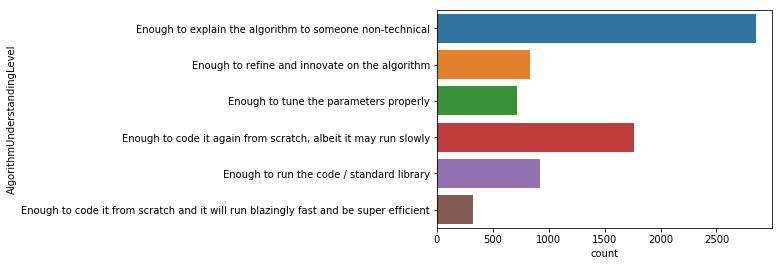

In [108]:
sns.countplot(y = mcq['AlgorithmUnderstandingLevel'])

--------------
Answer) 알고리즘을 비전공자에게 설명할 수 있을 정도면 된다는 답변이 가장 많다. 그리고 느려도 밑바닥부터 다시 코딩해 볼 수 있는게 중요하다는 응답이 그 뒤를 잇는다.

## Q16. 어디에서 일을 찾아야 할까요?

In [109]:
question.loc[question['Column'].str.contains('JobSearchResource|EmployerSearchMethod')]

,Column,Question,Asked
108,EmployerSearchMethod,How did you find your current job? - Selected ...,CodingWorker-NC
109,EmployerSearchMethodOtherFreeForm,How did you find your current job? - Some othe...,CodingWorker-NC
271,JobSearchResource,Which resource has been the best for finding d...,Learners
272,JobSearchResourceFreeForm,Which resource has been the best for finding d...,Learners


- 설문내용과 대상자이다

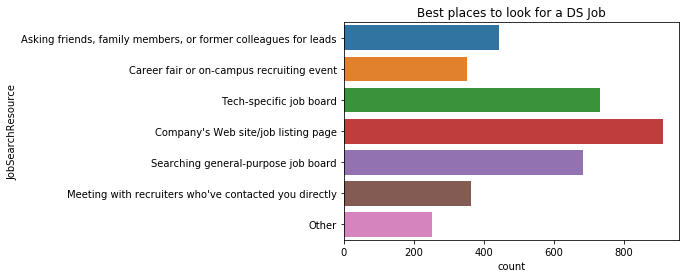

In [110]:
plt.title('Best places to look for a DS Job')
sns.countplot(y = mcq['JobSearchResource'])

- 학습자를 대상으로 한 답변이다. 회사 웹사이트나 구직사이트로부터 찾는다는 의견이 가장 많다. 그리고 특정 기술의 채용게시판, 일반 채용 게시판 등이 뒤를 잇는다.

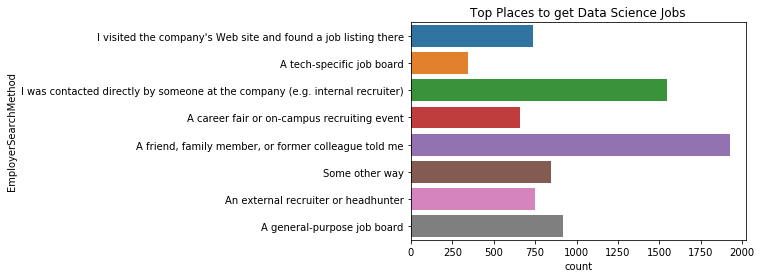

In [111]:
plt.title('Top Places to get Data Science Jobs')
sns.countplot(y=mcq['EmployerSearchMethod'])

- DS 관련 직무 종사자들의 답변이다. 친구, 가족, 이전 직장동료 등의 추천을 통해 채용됐다는 답변이 가장 많고, 특정회사에 소속된 사람에게 직접 연락을 해서 채용됐다는 답변이 뒤를 잇는다.

-------
Answer) 신입이라면 회사 웹사이트, 구직사이트 등을 통해 일을 구하고, 경력자라면 지인을 통하거나 직접 회사에 연락해서 이직하는 경우가 많은것으로 보인다.

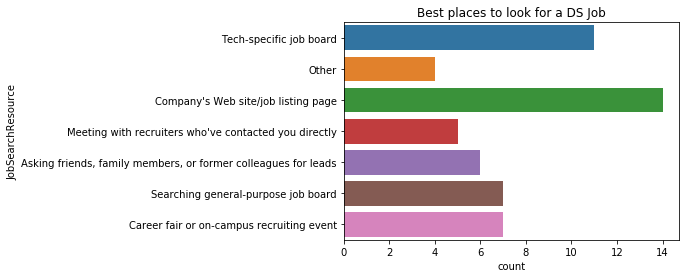

In [113]:
plt.title('Best places to look for a DS Job')
sns.countplot(y = korea['JobSearchResource'])

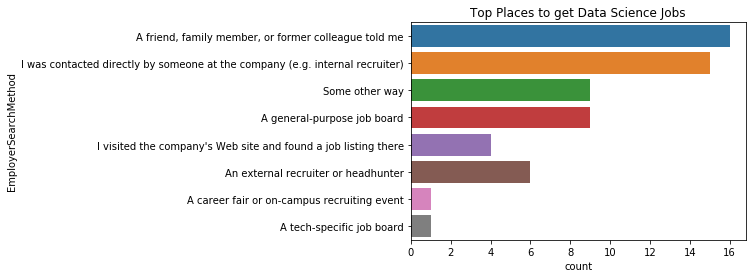

In [114]:
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod', data=korea)

- 한국인의 경우도 위 결과와 비슷하다. 신입의 경우 회사의 웹사이트, 구직사이트를 통해 일을 구한다는 답변이 가장 많고, 경력자는 지인 또는 직접연락을 통해 채용됐다는 답변이 많다.